# Assignment 2

### Question 1) 
Read the "earthquake.csv" file as a DataFrame object. 
Each row represents a report sent from someone’s mobile phone indicating an emergency or some other problem. Each has an associated timestamp as "incident date" and a location as "latitude" and "longitude". Print the first 10 records for these 3 columns.

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import datetime


In [3]:
#solution code
df = pd.read_csv("earthquake.csv")


df[["INCIDENT DATE","LATITUDE","LONGITUDE"]].head(10)


,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


### Question 2)
The CATEGORY field contains a comma-separated list of codes indicating the type of message. Check the rows for missing values in "CATEGORY" column. Show which entries in a dataFrame are missing.

In [4]:
#solution code

df_category_missing = df[df["CATEGORY"].isnull()] ## I created new dataframe which contains all null values in CATEGORY column.

print("Number of records which have null value in CATEGORY column: " + str(df_category_missing.index.size))

df_category_missing.loc[:]


Number of records which have null value in CATEGORY column: 6


,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
1198,2777,"Food needed in Castro area, near airport 10 De...",24/01/2010 23:31,10 Dessaline Road,hungry grangou. We are in the Cit?? Castro a...,NaN,18.567320,-72.293280,YES,NO
1531,2436,Food Needed in Fontamara 27,22/01/2010 23:04,Fontamara 27 (off Rue National 2) Coordinates ...,NOU NAN FONTAMARA 27 PROLONGE NOU PA WE PES?N\...,NaN,18.532570,-72.367540,YES,NO
1828,2130,"15 People, 5 Babies, Water and Food Needed at ...",23/01/2010 18:07,Airport Runway Entrance - one end of the runwa...,nou sou wout aewopo a antre pis la nou se 15 f...,NaN,18.580320,-72.312390,YES,NO
2620,1182,Trapped person,19/01/2010 05:19,"Delmas, 33 Rue Derrosier Impas Du Crist, Numbe...",Mwen.se MADAM LAINE FRITZ MWEN RETE DELMAS 33 ...,NaN,18.559451,-72.295522,YES,NO
2622,1179,500 to 600 people in a temporary shelter with ...,19/01/2010 05:57,"Grand Goave, Haiti",Nou anviron 500 a 600 moun nan abri pwoviswa g...,NaN,18.431400,-72.787200,YES,NO
2623,1178,500 to 600 people in a temporary shelter with ...,19/01/2010 05:57,"Grand Goave, Haiti",Nou anviron 500 a 600 moun nan abri pwoviswa g...,NaN,18.424764,-72.770300,YES,NO


### Question 3) 

If you notice above in the data summary, some of the categories are missing, so we might want to drop these data points. Additionally, call the describe function to show that there are some aberrant locations.
Clean the bad locations by considering conditions below and remove the missing categories. 

Conditions for location: 
- Latitude should be range of between 18 and 20
- Longitude should be range of between -70 and -75
            

In [5]:
#solution code
df.dropna(subset=["CATEGORY"],how = "all",inplace=True) ## Drops all null values in CATEGORY column

lat_long = df[((df["LATITUDE"] < 18) | (df["LATITUDE"] > 20) | (df["LONGITUDE"] > -70) | (df["LONGITUDE"] < -75))].index ## Check for condition


print("OLD  Summary Values\n")
print(df.describe())
print("****************\n")
df.drop(lat_long,inplace=True) ## drops rows which are not satisfying the condition above.

print("NEW Summary Values\n")
print(df.describe())


print("****************")



df.head()




OLD  Summary Values

            Serial     LATITUDE    LONGITUDE
count  3587.000000  3587.000000  3587.000000
mean   2080.723446    18.611655   -72.322432
std    1171.716976     0.739174     3.653812
min       4.000000    18.041313   -74.452757
25%    1071.500000    18.524099   -72.417500
50%    2164.000000    18.539269   -72.335000
75%    3089.500000    18.561810   -72.293473
max    4052.000000    50.226029   114.174287
****************

NEW Summary Values

            Serial     LATITUDE    LONGITUDE
count  3569.000000  3569.000000  3569.000000
mean   2081.498459    18.592503   -72.424994
std    1170.311824     0.273695     0.291018
min       4.000000    18.041313   -74.452757
25%    1074.000000    18.524200   -72.417498
50%    2166.000000    18.539269   -72.335000
75%    3089.000000    18.561800   -72.293939
max    4052.000000    19.940630   -71.099489
****************


,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO


Now we might want to do some analysis or visualization of this data by category, but each category field may have multiple categories. Additionally, each category is given as a code plus an English and possibly also a French code name. Thus, a little bit of wrangling is required to get the data into a more agreeable form. First, write the functions to get a list of all the categories and to split each category into a code and an English name

In [6]:
df["CATEGORY"].head(10)

0           1. Urgences | Emergency, 3. Public Health, 
4                             1. Urgences | Emergency, 
5                        5e. Communication lines down, 
6     4. Menaces | Security Threats, 4e. Assainissem...
7                       4. Menaces | Security Threats, 
8     2. Urgences logistiques | Vital Lines, 2f. San...
9     2. Urgences logistiques | Vital Lines, 2d. Ref...
10    1a. Highly vulnerable, 2. Urgences logistiques...
11    4. Menaces | Security Threats, 4e. Assainissem...
12    2. Urgences logistiques | Vital Lines, 2d. Ref...
Name: CATEGORY, dtype: object

In [7]:
#solution code
def getCategoriesSplitted(df):
    categorylines = df.CATEGORY.unique()
    categoriesDivided = []

    for i in categorylines:
        temp_category=i.split(",")
        for j in temp_category:
            if j == temp_category[-1]:  # prevent to add extra " " elements to the categoriesDivided list.
                break  
            categoriesDivided.append(j)

    return categoriesDivided
Cat_without_translation = getCategoriesSplitted(df)
print("First 8 element of list of Categories:\n",Cat_without_translation[:8])





First 8 element of list of Categories:
 ['1. Urgences | Emergency', ' 3. Public Health', '1. Urgences | Emergency', '5e. Communication lines down', '4. Menaces | Security Threats', ' 4e. Assainissement eau et hygiene | Water sanitation and hygiene promotion', '4. Menaces | Security Threats', '2. Urgences logistiques | Vital Lines']


You can better understand how to write a function by looking at the result obtained from the **_get english_** function below.

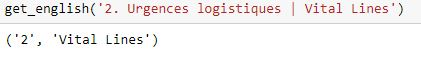

In [8]:
#solution code
def get_english(category):
    cat_list = category.split(".")
    if "|" in cat_list[1]:
        line_list = cat_list[1].split("|")
        cat_list[1] = line_list[1][1:]
    else:
        cat_list[1] = cat_list[1][1:]
    print(cat_list)


get_english(Cat_without_translation[3])  # Example of get_english function.


['5e', 'Communication lines down']


### Question 4)

Write a function to make a dict mapping code to name for "CATEGORY" column.

In [9]:
#solution code
def get_dict(list_of_Categories): # takes argument of list of categories. I have to convert column to list but I already wrote that function so I passed list of categories directly to that function to avoid duplicate code.
    category_dict = {}

    for i in list_of_Categories:
        cat_list = i.split(".")
        if "|" in cat_list[1]:
            line_list = cat_list[1].split("|")
            cat_list[1] = line_list[1][1:]
        else:
            cat_list[1] = cat_list[1][1:]
        
        val = cat_list[1]
        key = cat_list[0]
        category_dict[key] = val

    return category_dict

english_mapping = get_dict(Cat_without_translation) #  Used Cat_without_translation  as listed categories.


english_mapping["6c"]



'Earthquake and aftershocks'

You can better understand how to write a function by looking at the result obtained from the **_english_mapping_** below.

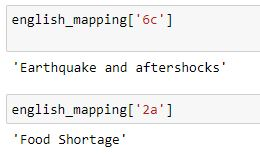

### Question 5) 
Read the "births.csv" file as a DataFrame object. Use a pivot table to understand the data. Add a column called "quinquennial" to analyze male and female total births every five years.

In [10]:
#solution code

df_birthday = pd.read_csv("births.csv")
print(df_birthday.columns)
print(df_birthday.index.size)
df_birthday.head(100)

Index(['year', 'month', 'day', 'gender', 'births'], dtype='object')
15547


,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
95,1969,2,16.0,M,4416
96,1969,2,17.0,F,4768
97,1969,2,17.0,M,5054
98,1969,2,18.0,F,4962


In [33]:
df_pivot = pd.pivot_table(data = df_birthday[["year","gender","births"]],index="year",columns="gender",aggfunc="sum")

print(df_pivot.head())
for i in df_pivot:
    print(i)

         births         
gender        F        M
year                    
1969    1753634  1846572
1970    1819164  1918636
1971    1736774  1826774
1972    1592347  1673888
1973    1533102  1613023
('births', 'F')
('births', 'M')


In [12]:
df_birthday.groupby("year")

### Question 6)
Plot the total number of US births by year and gender to see the annual trend in births by gender. Make your own comment for the graph.

In [13]:
#solution code
df_birthday.groupby(["year","gender"])["births"].sum() ## Returns sum value of every year splitted by gender.

year  gender
1969  F         1753634
      M         1846572
1970  F         1819164
      M         1918636
1971  F         1736774
                 ...   
2006  M         2188268
2007  F         2111890
      M         2212118
2008  F         2077929
      M         2177227
Name: births, Length: 80, dtype: int64

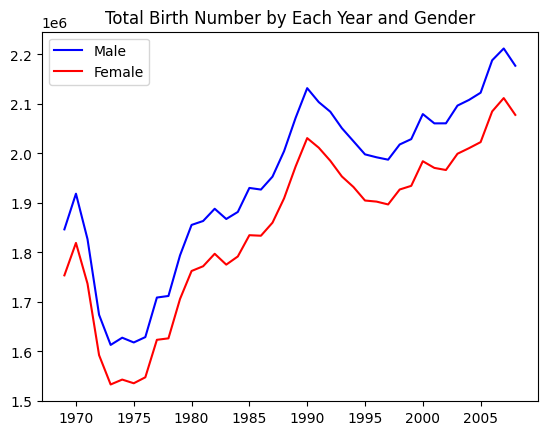

In [14]:

a = df_birthday.groupby(["year","gender"])["births"].sum().values # Birth values for 2 genders. F-M-F-M -- goes like that.

Birth_male = []
Birth_Female = []

for i in range(len(a)):
    if i % 2 == 0:
        Birth_Female.append(a[i])
    else:
        Birth_male.append(a[i])

plt.plot(df_birthday["year"].unique(),Birth_male,color="blue",label = "Male")
plt.plot(df_birthday["year"].unique(),Birth_Female,color="red",label = "Female")
plt.legend()
plt.title("Total Birth Number by Each Year and Gender")
plt.show()


# Every year between 1969 and 2008, number of birth number of boys is higher than girls. Also their changing trends are  similar.

### Question 7)
Display the mean of birth values for females and males in the same histogram.

Note: x-axis: mean values, y-axis: year of birth

In [15]:
#solution code
val=df_birthday.groupby(["year","gender"],as_index=False)["births"].sum().values
#[1969 'F' 1753634]
#[1969 'M' 1846572]
#[1970 'F' 1819164]
#[1970 'M' 1918636]
#[1971 'F' 1736774]
# Returns list that contains value like above. 


In [16]:
mean_M = []
mean_F = []

for i in range(len(val)):
    val[i][2] = val[i][2] /12 # .mean() is not working since there are null values in the last part of the dataset.
    if (i % 2 == 0):
        mean_F.append(val[i][2])
    else:
        mean_M.append(val[i][2])

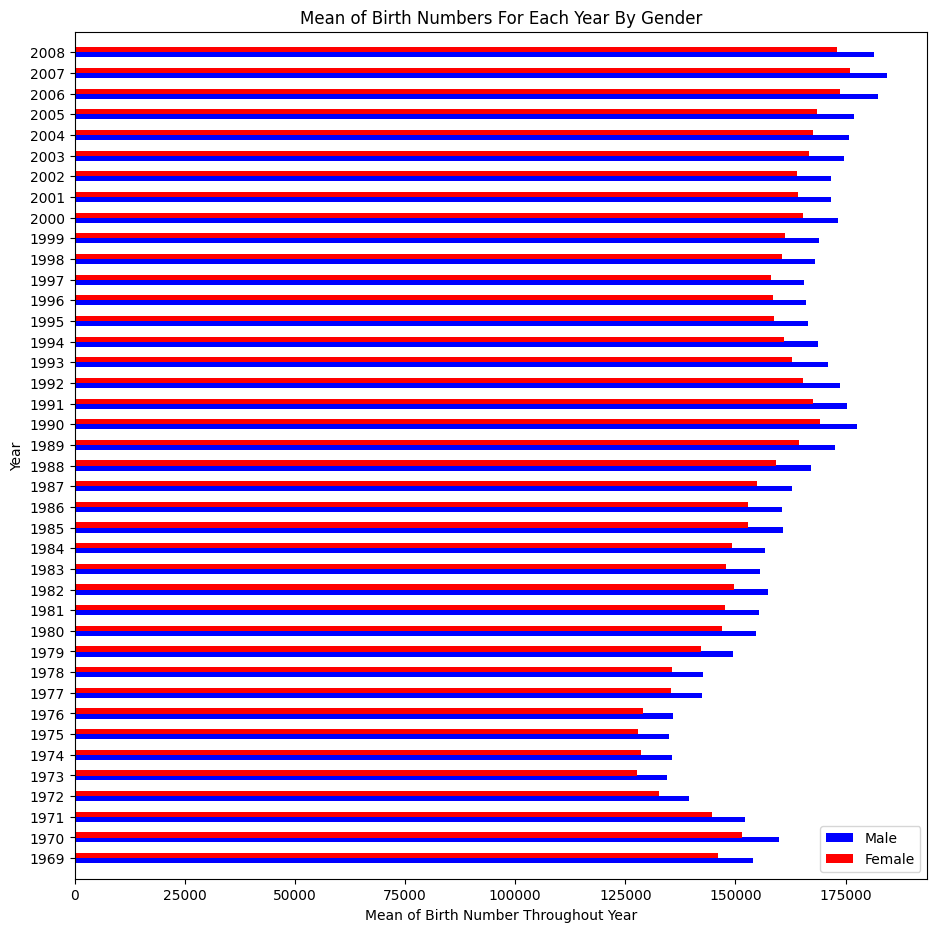

In [17]:

fig,plot = plt.subplots()
fig.set_size_inches(11,11)
width=0.25
years = df_birthday["year"].unique() # get year values 





plot.barh(years-0.12,mean_M,width,color ="blue",label="Male")
plot.barh(years+0.12,mean_F,width,color="red",label="Female")



plt.ylim(years[0]-1,years[-1]+1)
plt.yticks(years)
plt.legend()
plt.title("Mean of Birth Numbers For Each Year By Gender")
plt.xlabel("Mean of Birth Number Throughout Year")
plt.ylabel("Year")
plt.show()

### Question 8)

Read the "tip.csv" file as a DataFrame object. Add a column presents tip percentage of total bill and generate a KDE (Kernel Density Estimate) plot.


In [18]:
# solution code
df_tip = pd.read_csv("tip.csv")

df_tip["Tip_percentage"] = df_tip["tip"] / df_tip["total_bill"] * 100
df_tip.head()


,total_bill,tip,sex,smoker,day,time,size,Tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


<AxesSubplot: ylabel='Density'>

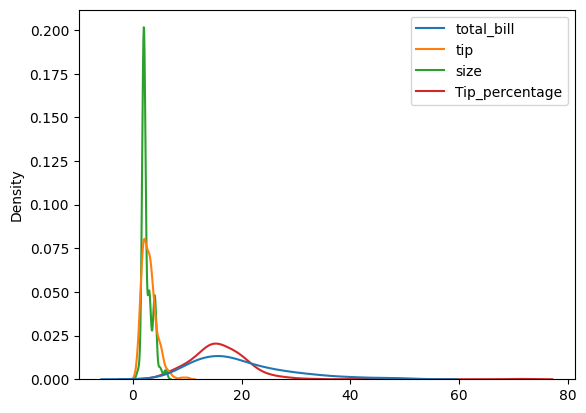

In [19]:
# I couldn't figure out which part should I plot, so I plotted all dataframe and tip percentage column seperately.
sbn.kdeplot(df_tip)

<AxesSubplot: xlabel='Tip_percentage', ylabel='Density'>

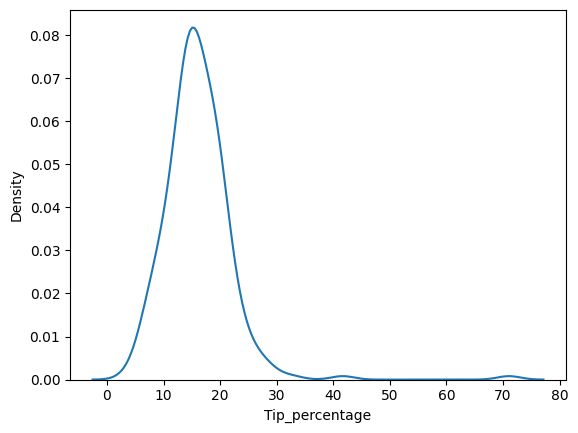

In [20]:
sbn.kdeplot(df_tip,x=df_tip["Tip_percentage"])

### Question 9)
Group the tip data by sex and smoker to present mean and standard deviation scores for tip percentage.

In [21]:
# solution code
print("Mean Values")

print(df_tip.groupby(["sex","smoker"])["Tip_percentage"].mean() , "\n")



print("Standart Deviation")
df_tip.groupby(["sex","smoker"])["Tip_percentage"].std()


Mean Values
sex     smoker
Female  No        15.692097
        Yes       18.215035
Male    No        16.066872
        Yes       15.277118
Name: Tip_percentage, dtype: float64 

Standart Deviation


sex     smoker
Female  No        3.642118
        Yes       7.159451
Male    No        4.184875
        Yes       9.058794
Name: Tip_percentage, dtype: float64

### Question 10)
Create a stacked bar plot displaying the frequency of data points for each size on each day

In [22]:
# soution code

labels = ["Fri","Sat","Sun","Thur"]
all_list=df_tip.groupby("day",as_index=False)[["size"]].value_counts().values
print("********************************************************************************")
print(all_list[:])
print("********************************************************************************")

# Created 0 list of size of labels.

size1 = [0 for i in range(len(labels))]
size2 = [0 for i in range(len(labels))]
size3 = [0 for i in range(len(labels))]
size4 = [0 for i in range(len(labels))]
size5 = [0 for i in range(len(labels))]
size6 = [0 for i in range(len(labels))]


# Filling the size occurences.

for i in all_list:
    if i[0] == "Fri":
        if i[1] == 1:
            size1[0] = i[2]
        elif i[1] == 2:
            size2[0] = i[2]
        elif i[1] == 3:
            size3[0] = i[2]
        elif i[1] == 4:
            size4[0] = i[2]
        elif i[1] == 5:
            size5[0] = i[2]
        elif i[1] == 6:
            size6[0] = i[2]
        
    if i[0] == "Sat":
        if i[1] == 1:
            size1[1] = i[2]
        elif i[1] == 2:
            size2[1] = i[2]
        elif i[1] == 3:
            size3[1] = i[2]
        elif i[1] == 4:
            size4[1] = i[2]
        elif i[1] == 5:
            size5[1] = i[2]
        elif i[1] == 6:
            size6[1] = i[2]
       

    if i[0] == "Sun":
        if i[1] == 1:
            size1[2] = i[2]
        elif i[1] == 2:
            size2[2] = i[2]
        elif i[1] == 3:
            size3[2] = i[2]
        elif i[1] == 4:
            size4[2] = i[2]
        elif i[1] == 5:
            size5[2] = i[2]
        elif i[1] == 6:
            size6[2] = i[2]
        
    if i[0] == "Thur":
        if i[1] == 1:
            size1[3] = i[2]
        elif i[1] == 2:
            size2[3] = i[2]
        elif i[1] == 3:
            size3[3] = i[2]
        elif i[1] == 4:
            size4[3] = i[2]
        elif i[1] == 5:
            size5[3] = i[2]
        elif i[1] == 6:
            size6[3] = i[2]



********************************************************************************
[['Fri' 2 16]
 ['Fri' 4 1]
 ['Fri' 3 1]
 ['Fri' 1 1]
 ['Sat' 2 53]
 ['Sat' 3 18]
 ['Sat' 4 13]
 ['Sat' 1 2]
 ['Sat' 5 1]
 ['Sun' 2 39]
 ['Sun' 4 18]
 ['Sun' 3 15]
 ['Sun' 5 3]
 ['Sun' 6 1]
 ['Thur' 2 48]
 ['Thur' 4 5]
 ['Thur' 3 4]
 ['Thur' 6 3]
 ['Thur' 1 1]
 ['Thur' 5 1]]
********************************************************************************


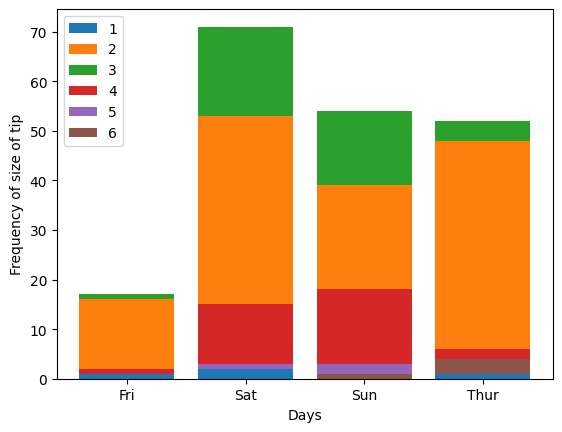

In [23]:
fig, bars = plt.subplots()

bars.bar(labels,size1,label="1")
bars.bar(labels,size2,label = "2",bottom = size1)
bars.bar(labels,size3,label = "3",bottom = size2)
bars.bar(labels,size4,label = "4",bottom = size1)
bars.bar(labels,size5,label = "5",bottom = size1)
bars.bar(labels,size6,label = "6",bottom =size1)
plt.ylabel("Frequency of size of tip")
plt.xlabel("Days")
plt.legend()
plt.show()

### Question 11)

Create a new stacked bar plot that has normalized values from a graph at Q10 so that each row sums to 1.

[19, 87, 76, 62]


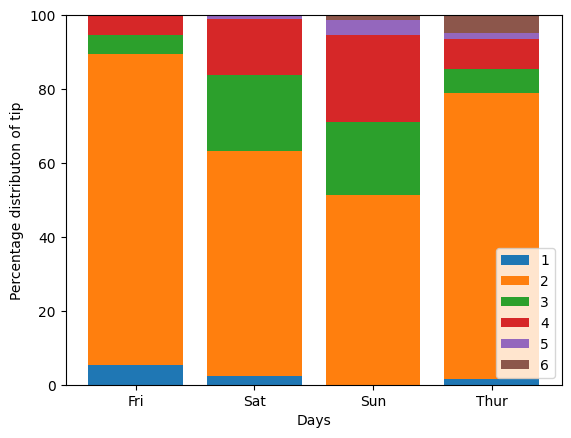

In [24]:
# solution code
labels = ["Fri","Sat","Sun","Thur"]
all_list=df_tip.groupby("day",as_index=False)[["size"]].value_counts().values


totals = [a+b+c+d+e+f for a,b,c,d,e,f in zip(size1,size2,size3,size4,size5,size6)]
print(totals)

size1_per = [i/j *100 for i,j in zip(size1,totals)]
size2_per = [i/j *100 for i,j in zip(size2,totals)]
size3_per = [i/j *100 for i,j in zip(size3,totals)]
size4_per = [i/j *100 for i,j in zip(size4,totals)]
size5_per = [i/j *100 for i,j in zip(size5,totals)]
size6_per = [i/j *100 for i,j in zip(size6,totals)]


fig, bars = plt.subplots()

bars.bar(labels,size1_per,label = "1")
bars.bar(labels,size2_per,label = "2",bottom = size1_per)
bars.bar(labels,size3_per,label = "3",bottom = [i+j for i,j in zip(size1_per, size2_per)])
bars.bar(labels,size4_per,label = "4",bottom = [i+j+k for i,j,k in zip(size1_per,size2_per,size3_per)])
bars.bar(labels,size5_per,label = "5",bottom = [i+j+k+l for i,j,k,l in zip(size1_per,size2_per,size3_per,size4_per)])
bars.bar(labels,size6_per,label = "6",bottom = [i+j+k+l+m for i,j,k,l,m in zip (size1_per,size2_per,size3_per,size4_per,size5_per)])
plt.ylabel("Percentage distributon of tip")
plt.xlabel("Days")
plt.legend()
plt.show()